# Numerical Methods - Assignment 1

## 1. Python and MATLAB
List at least 3 differences between Python and MATLAB.

## 2. Plot Data
**Read the data and create a plot.**
- Import `matplotlib` and `pandas` packages.
- Read in `data/ethanol_IR.csv` file and create a plot of IR spectra data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/ethanol_IR.csv')

In [2]:
x = df['wavenumber [cm^-1]']
y = df['absorbance']

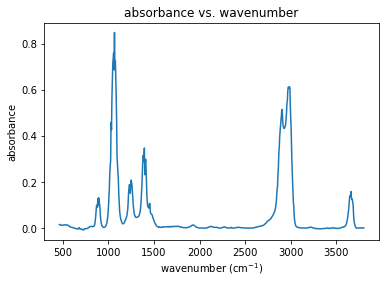

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('wavenumber (cm$^{-1}$)')
ax.set_ylabel('absorbance')
ax.set_title('absorbance vs. wavenumber');

**Briefly describe the most prominent peaks in the dataset.**

## 3. Matrix-vector Multiplication
**Write a funcion that uses `for` loops.**

This function should multiply an arbitrary matrix and vector.

In [4]:
def mulMatVec(matrix, vector):
    result = []
    
    for i in range(matrix.shape[0]):
        dot = 0
        
        for j in range(matrix.shape[1]):
            dot += matrix[i][j] * vector[j]
            
        result.append(dot)
        
    result = np.array(result)
    return result

You can use the matrix and vector given below.

In [5]:
import numpy as np

A = np.array([[1, 2], [-4, 5]])
B = np.array([-2, 3])

Or create an arbitrary set of matrix and vector using `numpy.random.rand`.

In [6]:
from numpy.random import rand

# You can create your own inputs

**Show that your function is correct using `numpy.isclose`.**

In [7]:
np.isclose(mulMatVec(A, B), np.dot(A, B))

array([ True,  True])

## 4. Vandermonde Matrix
**Use `numpy.hstack` to construct a 4th-order Vandermonde matrix.**

Range should be from -1 to 1 with a resolution of 25 (i.e. the number of rows should be 25).

In [8]:
resolution = 25

xi = np.linspace(-1, 1, 25).reshape(-1, 1)

X_vdm = np.hstack((xi**0, xi**1, xi**2, xi**3, xi**4))

print(X_vdm)

[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00]
 [ 1.00000000e+00 -9.16666667e-01  8.40277778e-01 -7.70254630e-01
   7.06066744e-01]
 [ 1.00000000e+00 -8.33333333e-01  6.94444444e-01 -5.78703704e-01
   4.82253086e-01]
 [ 1.00000000e+00 -7.50000000e-01  5.62500000e-01 -4.21875000e-01
   3.16406250e-01]
 [ 1.00000000e+00 -6.66666667e-01  4.44444444e-01 -2.96296296e-01
   1.97530864e-01]
 [ 1.00000000e+00 -5.83333333e-01  3.40277778e-01 -1.98495370e-01
   1.15788966e-01]
 [ 1.00000000e+00 -5.00000000e-01  2.50000000e-01 -1.25000000e-01
   6.25000000e-02]
 [ 1.00000000e+00 -4.16666667e-01  1.73611111e-01 -7.23379630e-02
   3.01408179e-02]
 [ 1.00000000e+00 -3.33333333e-01  1.11111111e-01 -3.70370370e-02
   1.23456790e-02]
 [ 1.00000000e+00 -2.50000000e-01  6.25000000e-02 -1.56250000e-02
   3.90625000e-03]
 [ 1.00000000e+00 -1.66666667e-01  2.77777778e-02 -4.62962963e-03
   7.71604938e-04]
 [ 1.00000000e+00 -8.33333333e-02  6.94444444e-03 -5.78703704e-04

**Create an orthonormal version of the Vandermonde matrix.**

Orthonormal means:
- the $L_2$ norm of each column is 1.
- the inner product between any 2 columns is 0.

Print the orthonormalized Vandermonde matrix.

In [9]:
# Gram-Schmidt Process

ortho_1 = X_vdm[:, 0]
ortho_2 = X_vdm[:, 1] - np.dot(ortho_1, X_vdm[:, 1]) / np.dot(ortho_1, ortho_1) * ortho_1
ortho_3 = X_vdm[:, 2] - np.dot(ortho_1, X_vdm[:, 2]) / np.dot(ortho_1, ortho_1) * ortho_1 - np.dot(ortho_2, X_vdm[:, 2]) / np.dot(ortho_2, ortho_2) * ortho_2
ortho_4 = X_vdm[:, 3] - np.dot(ortho_1, X_vdm[:, 3]) / np.dot(ortho_1, ortho_1) * ortho_1 - np.dot(ortho_2, X_vdm[:, 3]) / np.dot(ortho_2, ortho_2) * ortho_2 - np.dot(ortho_3, X_vdm[:, 3]) / np.dot(ortho_3, ortho_3) * ortho_3
ortho_5 = X_vdm[:, 4] - np.dot(ortho_1, X_vdm[:, 4]) / np.dot(ortho_1, ortho_1) * ortho_1 - np.dot(ortho_2, X_vdm[:, 4]) / np.dot(ortho_2, ortho_2) * ortho_2 - np.dot(ortho_3, X_vdm[:, 4]) / np.dot(ortho_3, ortho_3) * ortho_3 - np.dot(ortho_4, X_vdm[:, 4]) / np.dot(ortho_4, ortho_4) * ortho_4

# Normalizing columns

orthoNorm_1 = ortho_1 / np.linalg.norm(ortho_1, 2)
orthoNorm_2 = ortho_2 / np.linalg.norm(ortho_2, 2)
orthoNorm_3 = ortho_3 / np.linalg.norm(ortho_3, 2)
orthoNorm_4 = ortho_4 / np.linalg.norm(ortho_4, 2)
orthoNorm_5 = ortho_5 / np.linalg.norm(ortho_5, 2)

# Change to columns

orthoNorm_1 = orthoNorm_1.reshape(-1, 1)
orthoNorm_2 = orthoNorm_2.reshape(-1, 1)
orthoNorm_3 = orthoNorm_3.reshape(-1, 1)
orthoNorm_4 = orthoNorm_4.reshape(-1, 1)
orthoNorm_5 = orthoNorm_5.reshape(-1, 1)

# Build a matrix

X_vdm_orthonorm = np.hstack((orthoNorm_1, orthoNorm_2, orthoNorm_3, orthoNorm_4, orthoNorm_5))
print(X_vdm_orthonorm)

[[ 2.00000000e-01 -3.32820118e-01  3.96566460e-01 -4.15922412e-01
   4.01324069e-01]
 [ 2.00000000e-01 -3.05085108e-01  2.97424845e-01 -2.07961206e-01
   6.68873448e-02]
 [ 2.00000000e-01 -2.77350098e-01  2.06904240e-01 -4.52089579e-02
  -1.36682835e-01]
 [ 2.00000000e-01 -2.49615088e-01  1.25004645e-01  7.64442378e-02
  -2.37146040e-01]
 [ 2.00000000e-01 -2.21880078e-01  5.17260600e-02  1.61108286e-01
  -2.59618073e-01]
 [ 2.00000000e-01 -1.94145069e-01 -1.29315150e-02  2.12893092e-01
  -2.26570966e-01]
 [ 2.00000000e-01 -1.66410059e-01 -6.89680800e-02  2.35908562e-01
  -1.57832983e-01]
 [ 2.00000000e-01 -1.38675049e-01 -1.16383635e-01  2.34264600e-01
  -7.05886207e-02]
 [ 2.00000000e-01 -1.10940039e-01 -1.55178180e-01  2.12071111e-01
   2.06213948e-02]
 [ 2.00000000e-01 -8.32050294e-02 -1.85351715e-01  1.73438002e-01
   1.03900105e-01]
 [ 2.00000000e-01 -5.54700196e-02 -2.06904240e-01  1.22475177e-01
   1.69994319e-01]
 [ 2.00000000e-01 -2.77350098e-02 -2.19835755e-01  6.32925410e-02

**Short version**

In [10]:
X_vdm_ortho = [X_vdm[:, 0] / np.linalg.norm(X_vdm[:, 0], 2)]

for i in range(1, X_vdm.shape[1]):
    gramSchmidt = X_vdm[:, i]
    
    for j in range(i):
        gramSchmidt -= np.dot(X_vdm[:, i], X_vdm_ortho[j]) * X_vdm_ortho[j]
        
    X_vdm_ortho.append(gramSchmidt / np.linalg.norm(gramSchmidt, 2))

X_vdm_ortho = np.array(X_vdm_ortho)
X_vdm_ortho = X_vdm_ortho.T

In [11]:
np.isclose(X_vdm_ortho, X_vdm_orthonorm).all()

True

**Show that the $L_2$ of 5th column is 1.**

In [12]:
print(np.linalg.norm(X_vdm_orthonorm[:, 4], 2))

1.0


**Show that the inner product between 1st column & 4th column is 0.**

In [13]:
inn_prod = np.dot(X_vdm_orthonorm[:, 0], X_vdm_orthonorm[:, 3])
print(inn_prod)
print(np.isclose(0, inn_prod))

2.0816681711721685e-17
True


**Compute the rank of the orthonormalized Vandermonde matrix.**

In [14]:
print(np.linalg.matrix_rank(X_vdm_orthonorm))

5


**Show that the rank is equal to the number of columns.**

In [15]:
print('The rank of the matrix: {}'.format(np.linalg.matrix_rank(X_vdm_orthonorm)))
print('The number of columns: {}'.format(X_vdm_orthonorm.shape[1]))

The rank of the matrix: 5
The number of columns: 5


**Change the resolution to 30 and show that the rank is independent of the number of rows.**

In [16]:
xi_new = np.linspace(-1, 1, 30).reshape(-1, 1)

X_vdm_new = np.hstack((xi_new**0, xi_new**1, xi_new**2, xi_new**3, xi_new**4))

print('The rank of the new matrix: {}'.format(np.linalg.matrix_rank(X_vdm_new)))
print('The number of rows of the old matrix: {}'.format(X_vdm_orthonorm.shape[0]))
print('The number of rows of the new matrix: {}'.format(X_vdm_new.shape[0]))

The rank of the new matrix: 5
The number of rows of the old matrix: 25
The number of rows of the new matrix: 30
